**TITANIC SURVIVAL PREDICTION**

Objective of the Project:

The objective of this project is to develop a machine learning model that predicts whether a passenger aboard the Titanic survived or not, based on their demographic and travel information. The model will use features such as age, gender, ticket class, fare, cabin, and other relevant attributes to classify passengers into two categories: survived (1) and did not survive (0).

This project aims to:

- Understand and preprocess the Titanic dataset, including handling missing values, encoding categorical variables, and feature scaling.
- Analyze key factors influencing survival, such as socio-economic status, age, gender, and travel class.
- Build and evaluate classification models to accurately predict survival.


In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Exploratory Data Analysis**

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Null Value Check

In [7]:
df.isnull().sum()/df.shape[0]*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


Null Values are present in the columns of Age, Cabin and Embarked

In [8]:
#Handling Null Values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.drop('Cabin', axis=1, inplace=True) # Dropping 'Cabin' due to excessive missing values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#Confirming missing values have been handled
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Duplicate Value Check

In [9]:
df.duplicated().sum()

0

There are no duplicates present in the dataset.

**Data Visualizations**

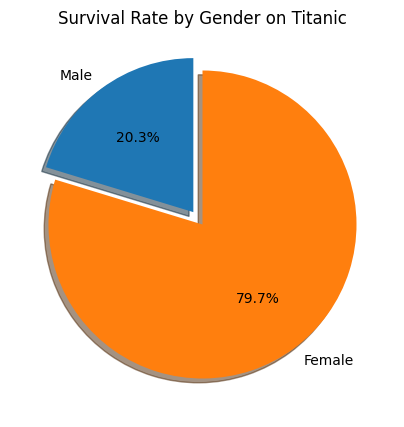

In [29]:
# Survival rate by gender
gender_survival_counts = df.groupby('Sex')['Survived'].sum()
gender_counts = df['Sex'].value_counts()
survival_rate_by_gender = (gender_survival_counts / gender_counts) * 100

# Labels for the pie chart (0: Male, 1: Female)
labels = ['Male', 'Female']

# pie chart
plt.figure(figsize=(5,5))
plt.pie(survival_rate_by_gender, labels=labels, autopct='%1.1f%%', startangle=90, explode=[0.1, 0], shadow=True)
plt.title('Survival Rate by Gender on Titanic')
plt.show()

Insight

Women had a significantly higher survival rate compared to men. This aligns with the historical account that women and children were prioritized during evacuation.

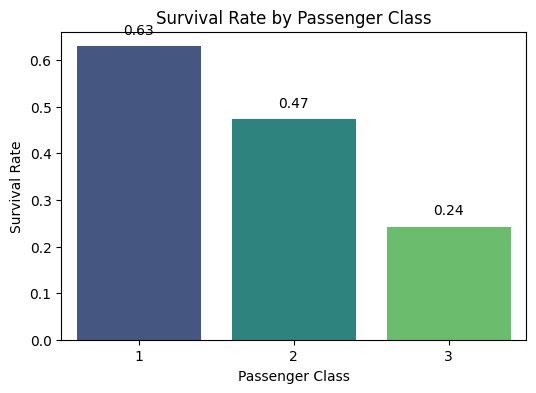

In [11]:
# Survival rate by class
survival_by_class = df.groupby('Pclass')['Survived'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
for i, value in enumerate(survival_by_class.values):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom')
plt.show()

Insight

Passengers in higher classes had a better chance of survival. This might reflect better access to lifeboats or priority given to first-class passengers.

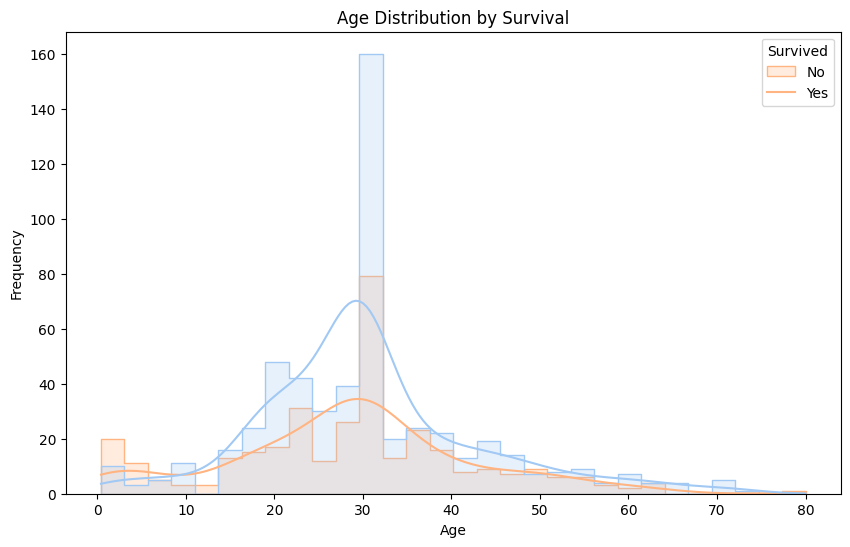

In [12]:
#Age Distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='pastel', element='step')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Insight:

Survivors are spread across all ages. Younger passengers, especially children, were more likely to survive, indicating prioritization during evacuation.

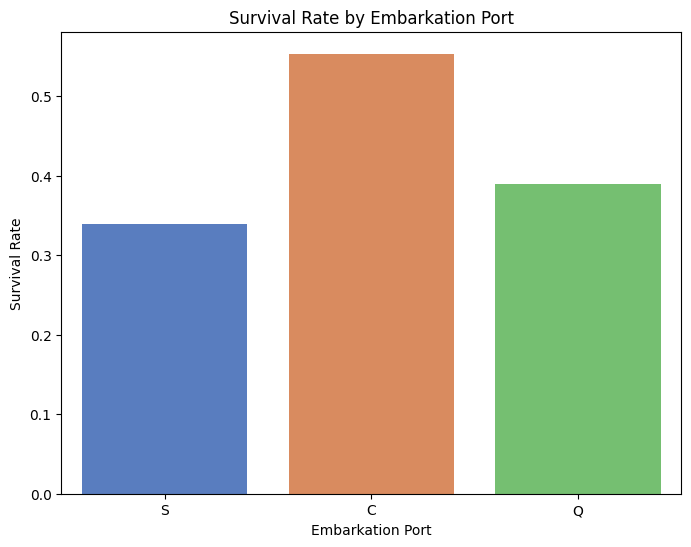

In [13]:
#Survival by Embarkation Port
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=df, ci=None, palette='muted')
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.xlabel('Embarkation Port')
plt.show()

Insight:

Passengers embarking from Cherbourg (C) had the highest survival rate (55%), while those from Southampton (S) had the lowest (~33%). Embarkation port may be an indirect indicator of passenger class and access to resources.

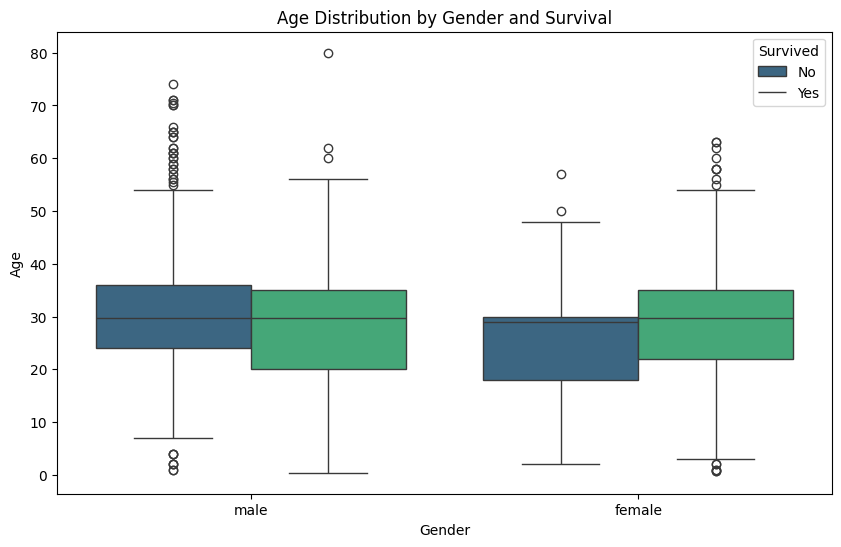

In [14]:
# Age Distribution by Gender and Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df, palette = 'viridis')
plt.title('Age Distribution by Gender and Survival')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

- Female survivors span a broader age range, whereas male survivors are mostly younger.
- Non-surviving males dominate all age groups.

Insight: Younger males and females had a better chance of survival, possibly due to physical agility or prioritization in evacuation.

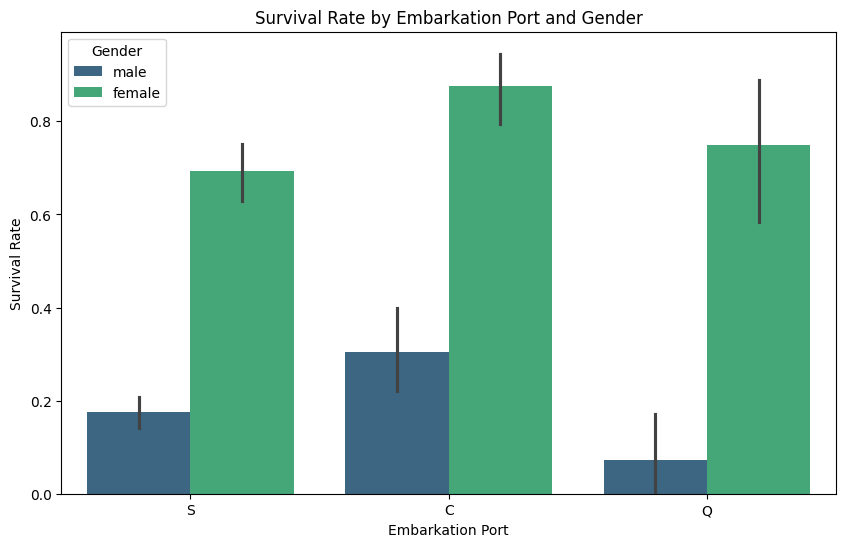

In [15]:
# Survival Rate by Embarkation Port and Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df, palette='viridis')
plt.title('Survival Rate by Embarkation Port and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Embarkation Port')
plt.legend(title='Gender')
plt.show()

- Females embarking from Cherbourg had the highest survival rate.
- Males from Southampton had the lowest survival rate.

Insight: Embarkation port reflects socio-economic factors, as Cherbourg passengers were more likely to be in higher classes

**Feature Engineering**

In [16]:
# Encode 'Sex' column (male: 0, female: 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked' column (male: 0, female: 1)
df['Embarked'] = df['Embarked'].map({"S": 1, "C": 2, "Q": 3})

# Drop non-relevant or highly unique columns ('Name', 'Ticket')
df = df.drop(columns=['Name', 'Ticket'])

# Confirm the encoding
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


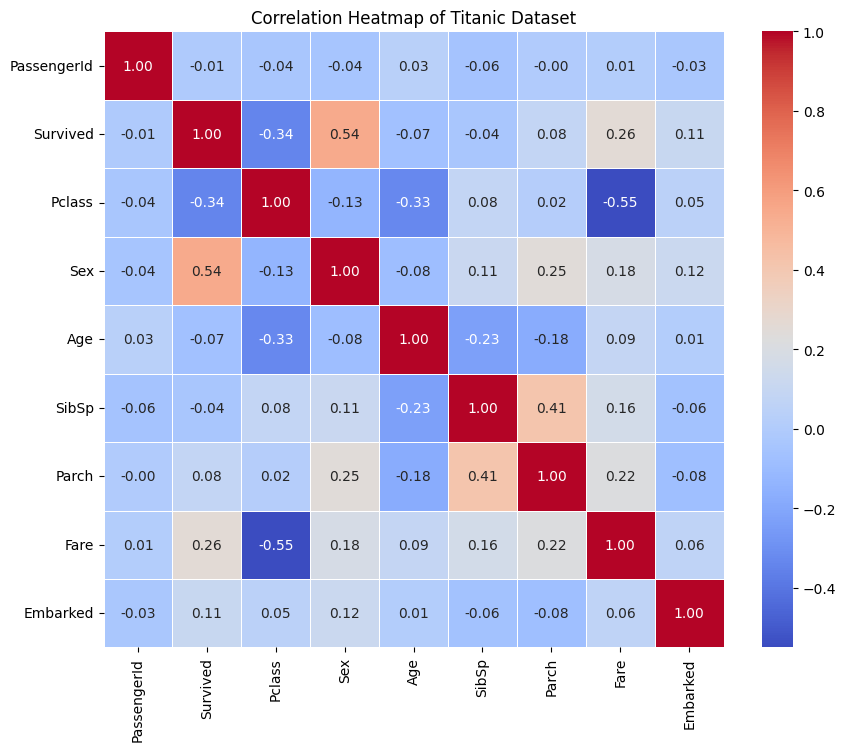

In [17]:
# Heatmap to view Correlations

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

Insight:

- Gender (Sex) is a critical factor in survival, with females having a much higher survival rate.
- Class (Pclass) and fare paid (Fare) are moderately important predictors of survival.
- Family-related variables (Parch and SibSp) are positively correlated, reflecting common family travel dynamics.
- Embarkation point (Embarked) has only a minor influence on survival.

**Model Training**

In [36]:
#Importing Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [19]:
# Scaling the data
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,-0.592481,1,0,-0.502445,1
1,2,1,1,1,0.638789,1,0,0.786845,2
2,3,1,3,1,-0.284663,0,0,-0.488854,1
3,4,1,1,1,0.407926,1,0,0.420730,1
4,5,0,3,0,0.407926,0,0,-0.486337,1


In [20]:
# Data Splitting
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [21]:
# Building Predictive Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Making Predictions
y_pred = model.predict(X_val)

In [22]:
#Model Evaluation

train_acc = accuracy_score(y_train, model.predict(X_train))
val_acc = accuracy_score(y_val, y_pred)

print(f"Training Accuracy: {train_acc}")
print(f"Validation Accuracy: {val_acc}")

Training Accuracy: 1.0
Validation Accuracy: 0.8258426966292135


We achieved a decent accuracy score of 82.6%

In [35]:
#Test data prediction

test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_acc}")

Test Accuracy: 0.8603351955307262


The classifier demonstrated strong performance on the test set as well with an accuracy of 86%.

**Conclusion:**

The Titanic survival prediction project successfully demonstrated the application of machine learning to classify passengers based on their likelihood of survival. We successfully built a classifier model that achieved reasonable accuracy and provided insights into the socio-economic and demographic factors affecting survival during the Titanic disaster. This project highlights the importance of data preprocessing, feature engineering, and model evaluation in building effective predictive models.






